In [ ]:
import pickle
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the data

In [ ]:
from google.colab import files
data = files.upload()

Saving retina_data.pickle to retina_data.pickle


In [ ]:
# load the pickle data
data = pickle.load(io.BytesIO(data['retina_data.pickle']))

## Data Exploration

In [ ]:
data['info']

{'Ncell': 43,
 'RecNo': 9,
 'RecStartTime': 2008,
 'SmplNo': 5,
 'animal': 'WT (chx10 het)',
 'date': '20080628',
 'description': 'multi-electrode recordings from mouse retinal ganglion cells',
 'experimenter': 'Yifeng Zhang, Markus Meister lab, Harvard University'}

In [ ]:
data['stimulus']

,type,onset,frame,Nframes,pixelsize,x,y,dx,dy,seed
0,binarywhitenoise,1.899872,0.016672,71864,8.3,640,480,2,480,-10000
1,binarywhitenoise,1.212172,0.033344,35983,8.3,640,320,8,8,-10000


In [ ]:
data['spikes'].shape

(43, 2)

In [ ]:
rec_id = 0 # recording ID
spikes = data['spikes'][:, rec_id]
start_time = data['stimulus'].loc[rec_id, 'onset']

##Exercises

1. Create a variable "frame_dt" and store in it the time duration of a single frame in the first record.


In [ ]:
# frame_dt =

2. Create a variable "n_frames" and store in it the number of frames shown in the first record




In [ ]:
# n_frames = 

3. Create a variable called "rec_duration" and store in it the calculated duration of the 1st record.

In [ ]:
# rec_duration = 

4. Which neuron fired the most during the 1st record?

In [ ]:
# your code goes here

##Raster Plot

In [ ]:
# raster calculate
raster = []
for neuron in spikes:
  bins = np.arange(start_time, rec_duration, 1)
  hist, bins = np.histogram(neuron, bins=bins)
  raster.append(hist)

raster = np.vstack(raster)

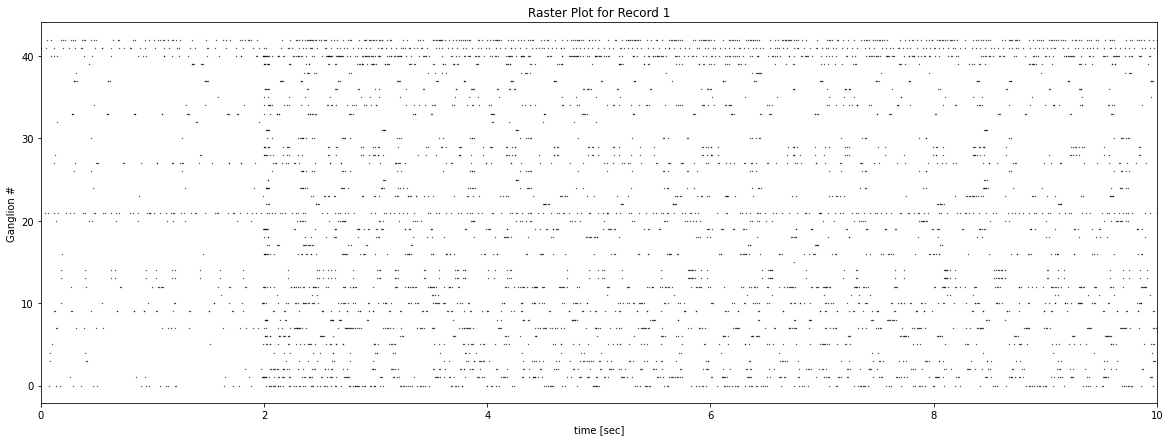

In [ ]:
# raster plot
plt.figure(figsize=(20,7))
for neuron_id, neuron_spike_times in enumerate(spikes):
  plt.scatter(neuron_spike_times, neuron_id * np.ones(neuron_spike_times.shape), c='black', s=0.1)
plt.xlabel('time [sec]')
plt.ylabel('Ganglion #')
plt.xlim([0, 10])
plt.title(f'Raster Plot for Record {rec_id + 1}')
plt.show()